# **Подгружаем библиотеки**

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Input, concatenate
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.metrics import Precision
from sklearn.model_selection import train_test_split 
import numpy as np
from keras.preprocessing.text import Tokenizer, text_to_word_sequence,tokenizer_from_json 

from sklearn.preprocessing import StandardScaler, LabelEncoder
import sklearn.metrics

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import time
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Подгружаем датасет, чистим от мусора, преобразуем данные в единый формат**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Стажировка/data2.xlsx') #читаем предоставленную таблицу

In [ ]:
column_list = df.columns.tolist() #создаем список колонок таблицы

In [ ]:
df_1 = df.dropna(axis=0, how='all') #удаляем пустые строки и столбцы
df_2 = df_1.dropna(axis=1, how='all')

In [ ]:
df_list_1 = [] #создаем список колоок содержащих МКБ
for i in column_list:
  if "МКБ" in i:
    df_list_1.append(i)

In [ ]:
df_list_1

['ПсихиатрияНаркология1_МКБ101',
 'Офтальмология1_МКБ101',
 'Оториноларингология1_МКБ101',
 'ХирургНеИсп1_МКБ101',
 'Гинекология1_МКБ101',
 'Стоматология1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Рентгенология1_МКБ101',
 'Неврология1_МКБ101',
 'Терапия1_МКБ101',
 'Хирургия1_МКБ101',
 'Офтальмология1_МКБ102',
 'Терапия2_МКБ101',
 'Неврология2_МКБ101',
 'ЛабораторныеИсследования1_МКБ101',
 'ЭКГНеИсп1_МКБ101',
 'УЗИДиагностика1_МКБ101',
 'УЗИДиагностика2_МКБ101',
 'ПсихиатрияНаркология2_МКБ101',
 'Терапия1_МКБ102',
 'ЛабораторныеИсследования2_МКБ101',
 'Терапия1_МКБ103',
 'Психиатрия1_МКБ101',
 'Гинекология1_МКБ102',
 'Рентгенология2_МКБ101',
 'Гинекология2_МКБ101',
 'Хирургия2_МКБ101',
 'ПроцедурнаяМедсестра1_МКБ101',
 'ФункциональнаяДиагностика1_МКБ101',
 'УЗИДиагностика1_МКБ102',
 'Стоматология2_МКБ101',
 'Неврология1_МКБ102',
 'Оториноларингология2_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'Хирургия1_МКБ102',
 'Хирургия2_МК

In [ ]:
df_list_di = [] #создаем список колонок с диагнозом 
for i in column_list:
  if "Диагноз_ЗначениеПредставление" in i:
    df_list_di.append(i)

In [ ]:
df_list_di

['ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление',
 'Офтальмология1_Диагноз_ЗначениеПредставление',
 'Оториноларингология1_Диагноз_ЗначениеПредставление',
 'ХирургНеИсп1_Диагноз_ЗначениеПредставление',
 'Гинекология1_Диагноз_ЗначениеПредставление',
 'Стоматология1_Диагноз_ЗначениеПредставление',
 'Дерматовенерология1_Диагноз_ЗначениеПредставление',
 'Неврология1_Диагноз_ЗначениеПредставление',
 'Хирургия1_Диагноз_ЗначениеПредставление',
 'Неврология2_Диагноз_ЗначениеПредставление',
 'ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление',
 'Психиатрия1_Диагноз_ЗначениеПредставление',
 'Гинекология2_Диагноз_ЗначениеПредставление',
 'Хирургия2_Диагноз_ЗначениеПредставление',
 'Стоматология2_Диагноз_ЗначениеПредставление',
 'Оториноларингология2_Диагноз_ЗначениеПредставление',
 'Дерматовенерология2_Диагноз_ЗначениеПредставление',
 'Терапия2_Диагноз_ЗначениеПредставление',
 'Офтальмология2_Диагноз_ЗначениеПредставление',
 'Терапия3_Диагноз_ЗначениеПредставление',
 'Терапия4_Диагноз_Знач

In [ ]:
df2=df_2[df_list_1]

In [ ]:
#df3 =df_2[df_list_di]

In [ ]:
df2.fillna(0, inplace=True)

<ipython-input-10-32f74130add2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(0, inplace=True)


In [ ]:
#df3.fillna(0, inplace=True)

<ipython-input-88-88c9cf2d6b5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(0, inplace=True)


In [ ]:
df4=df[[
  'КлиентДатаРождения',
  'КлиентПол',
  'Профессия',
  'ЗаключениеМК',
  'ДиспансернаяГруппа',
  'ВредныеФакторы']]

In [ ]:
df_full=pd.concat([df4,df2], axis=1, sort=False)

In [ ]:
#df_full_0=pd.concat([df4,df_full_0], axis=1, sort=False)

In [ ]:
df_full_1=df_full.dropna(subset=['ЗаключениеМК'])

In [ ]:
df_full_1['КлиентДатаРождения'] = pd.to_datetime(df_full_1['КлиентДатаРождения'], errors="coerce")
df_full_1["Возраст"] = \
    (pd.to_datetime("today") - df_full_1["КлиентДатаРождения"]).astype('<m8[Y]')

<ipython-input-14-b3a31f71bf19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_1['КлиентДатаРождения'] = pd.to_datetime(df_full_1['КлиентДатаРождения'], errors="coerce")
<ipython-input-14-b3a31f71bf19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_1["Возраст"] = \


In [ ]:
df_full_1['КлиентДатаРождения']=df_full_1["Возраст"]

<ipython-input-15-d8f2baee0d43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_1['КлиентДатаРождения']=df_full_1["Возраст"]


In [ ]:
df_full_1 = df_full_1.drop(columns='Возраст')

In [ ]:
df_full_1.loc[df_full_1['КлиентПол'] == "Женский", 'КлиентПол'] = 0
df_full_1.loc[df_full_1['КлиентПол'] == "Мужской", 'КлиентПол'] = 1

In [ ]:
df_full_1["КлиентДатаРождения"]=df_full_1["КлиентДатаРождения"].astype (int)

In [ ]:
def getParameterAgeVect(arg):
    outClass =int((arg-13)/5)
    outClass = max(0, min(10,outClass))
    return outClass

In [ ]:
df_full_1['ВозрастКатегория'] = df_full_1['КлиентДатаРождения'].apply(getParameterAgeVect)

In [ ]:
df_full_1 = df_full_1.drop(columns='КлиентДатаРождения')

In [ ]:
df_full_1["ЗаключениеМК"].unique ()

array(['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах',
       'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден',
       'ОграниченноГоден', 'машинист бульдозера', 'Газоспасатель',
       ' Газоспасатель'], dtype=object)

**"машинист бульдозера", 'Газоспасатель', ' Газоспасатель' - явно лишние в заключении мед комиссии. **

In [ ]:
new = df_full_1.loc[~df['ЗаключениеМК'].isin(["машинист бульдозера", 'Газоспасатель', ' Газоспасатель'])]

In [ ]:
new["ЗаключениеМК"].unique()

array(['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах',
       'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден',
       'ОграниченноГоден'], dtype=object)

**Разделяю на 3 класса.**

**0 = годен,**

**1  =Ограниченно годен, НуждаетсяВДообследованииИЛечении и др.**

**2 - ВременноНегоден**

In [ ]:
new.loc[new['ЗаключениеМК'] == "Годен", 'ЗаключениеМК'] = 0
new.loc[new['ЗаключениеМК'] == "ГоденСКоррекциейЗрения", 'ЗаключениеМК'] = 1
new.loc[new['ЗаключениеМК'] == "ГоденБезРаботНаВысотах", 'ЗаключениеМК'] = 1
new.loc[new['ЗаключениеМК'] == "НуждаетсяВДообследованииИЛечении", 'ЗаключениеМК'] = 1
new.loc[new['ЗаключениеМК'] == "ВременноНегоден", 'ЗаключениеМК'] = 2
new.loc[new['ЗаключениеМК'] == "ОграниченноГоден", 'ЗаключениеМК'] = 1

In [ ]:
# преобразуем коды МКБ
list_of_alf=(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
list_of_alf

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
for i in list_of_alf:
  print("     new[i] = new[i].astype(str).str.replace(","'",i,"',","'","0.",25-list_of_alf.index(i)+1,"'",")", sep='')

     new[i] = new[i].astype(str).str.replace('A','0.26')
     new[i] = new[i].astype(str).str.replace('B','0.25')
     new[i] = new[i].astype(str).str.replace('C','0.24')
     new[i] = new[i].astype(str).str.replace('D','0.23')
     new[i] = new[i].astype(str).str.replace('E','0.22')
     new[i] = new[i].astype(str).str.replace('F','0.21')
     new[i] = new[i].astype(str).str.replace('G','0.20')
     new[i] = new[i].astype(str).str.replace('H','0.19')
     new[i] = new[i].astype(str).str.replace('I','0.18')
     new[i] = new[i].astype(str).str.replace('J','0.17')
     new[i] = new[i].astype(str).str.replace('K','0.16')
     new[i] = new[i].astype(str).str.replace('L','0.15')
     new[i] = new[i].astype(str).str.replace('M','0.14')
     new[i] = new[i].astype(str).str.replace('N','0.13')
     new[i] = new[i].astype(str).str.replace('O','0.12')
     new[i] = new[i].astype(str).str.replace('P','0.11')
     new[i] = new[i].astype(str).str.replace('Q','0.10')
     new[i] = new[i].astype(str

In [ ]:
new2=new.copy()

In [ ]:
new2.fillna(0, inplace=True)

In [ ]:
new.fillna(0, inplace=True)

<ipython-input-30-8cba954ed67a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.fillna(0, inplace=True)


In [ ]:
for i in df_list_1:
  new[i] = new[i].astype(str).str.replace('.','')

<ipython-input-31-7b0ed68127fe>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new[i] = new[i].astype(str).str.replace('.','')
<ipython-input-31-7b0ed68127fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new[i] = new[i].astype(str).str.replace('.','')


In [ ]:
new=new.drop(columns="ДиспансернаяГруппа")

In [ ]:
for i in new:
     new[i] = new[i].astype(str).str.replace('A','0.26')
     new[i] = new[i].astype(str).str.replace('B','0.25')
     new[i] = new[i].astype(str).str.replace('C','0.24')
     new[i] = new[i].astype(str).str.replace('D','0.23')
     new[i] = new[i].astype(str).str.replace('E','0.22')
     new[i] = new[i].astype(str).str.replace('F','0.21')
     new[i] = new[i].astype(str).str.replace('G','0.20')
     new[i] = new[i].astype(str).str.replace('H','0.19')
     new[i] = new[i].astype(str).str.replace('I','0.18')
     new[i] = new[i].astype(str).str.replace('J','0.17')
     new[i] = new[i].astype(str).str.replace('K','0.16')
     new[i] = new[i].astype(str).str.replace('L','0.15')
     new[i] = new[i].astype(str).str.replace('M','0.14')
     new[i] = new[i].astype(str).str.replace('N','0.13')
     new[i] = new[i].astype(str).str.replace('O','0.12')
     new[i] = new[i].astype(str).str.replace('P','0.11')
     new[i] = new[i].astype(str).str.replace('Q','0.10')
     new[i] = new[i].astype(str).str.replace('R','0.9')
     new[i] = new[i].astype(str).str.replace('S','0.8')
     new[i] = new[i].astype(str).str.replace('T','0.7')
     new[i] = new[i].astype(str).str.replace('U','0.6')
     new[i] = new[i].astype(str).str.replace('V','0.5')
     new[i] = new[i].astype(str).str.replace('W','0.4')
     new[i] = new[i].astype(str).str.replace('X','0.3')
     new[i] = new[i].astype(str).str.replace('Y','0.2')
     new[i] = new[i].astype(str).str.replace('Z','0.1')

In [ ]:
type(new["ПсихиатрияНаркология1_МКБ101"][0])

str

_____________________________

In [ ]:
new['СписокВредныхФакторов'] = new['ВредныеФакторы'].apply(lambda x: x.replace('.', 'x'))

In [ ]:
new=new.drop(columns="ВредныеФакторы")

In [ ]:
new

,КлиентПол,Профессия,ЗаключениеМК,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,...,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория,СписокВредныхФакторов
0,0,Ведущий специалист по организации обуения,0,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0,...,0,0,0,0,0,0,0,0,6,11x4
1,1,Ведущий специалист,0,0.1000,0.1000,0,0,0,0,0.1000,...,0,0,0,0,0,0,0,0,4,4x2x5
2,1,Главный менеджер,1,0.1000,0.19521,0,0,0,0,0.1000,...,0,0,0,0,0,0,0,0,4,4x2x5
3,1,Главный специалист,0,0,0.1000,0.1000,0.1000,0,0.1000,0,...,0,0,0,0,0,0,0,0,4,11x1
4,1,Старший специалист,1,0,0.19522,0.1000,0,0,0.1000,0,...,0,0,0,0,0,0,0,0,5,11x1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,0.1000,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,3,"4x4,4x5,6x1"
1962,1,Начальник лаборатории,0,0.1000,0,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4x4
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,0.1000,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,4,3x1x8x2
1973,1,Приемщик вагонов в депо,0,0.1000,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,3,"4x2x5,6x1"


_____________________________

# **Токенезируем строковые данные**

Поработаем с текстовым диагнозом

Создадим единую колоку содержащую все диагнозы всех специалистов для каждого отдельного случая (пациента-клиента)

In [ ]:
for i in df_list_di:
  print(i)

ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление
Офтальмология1_Диагноз_ЗначениеПредставление
Оториноларингология1_Диагноз_ЗначениеПредставление
ХирургНеИсп1_Диагноз_ЗначениеПредставление
Гинекология1_Диагноз_ЗначениеПредставление
Стоматология1_Диагноз_ЗначениеПредставление
Дерматовенерология1_Диагноз_ЗначениеПредставление
Неврология1_Диагноз_ЗначениеПредставление
Хирургия1_Диагноз_ЗначениеПредставление
Неврология2_Диагноз_ЗначениеПредставление
ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление
Психиатрия1_Диагноз_ЗначениеПредставление
Гинекология2_Диагноз_ЗначениеПредставление
Хирургия2_Диагноз_ЗначениеПредставление
Стоматология2_Диагноз_ЗначениеПредставление
Оториноларингология2_Диагноз_ЗначениеПредставление
Дерматовенерология2_Диагноз_ЗначениеПредставление
Терапия2_Диагноз_ЗначениеПредставление
Офтальмология2_Диагноз_ЗначениеПредставление
Терапия3_Диагноз_ЗначениеПредставление
Терапия4_Диагноз_ЗначениеПредставление
Терапия1_Диагноз_ЗначениеПредставление
Хирургия3_Диагноз_Значени

In [ ]:
df3 =df_2[df_list_di]

In [ ]:
df3.fillna(0, inplace=True)

<ipython-input-40-88c9cf2d6b5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(0, inplace=True)


In [ ]:
for i in df_list_di:
  print(" + df3[","'",i,"'","].map(str)+","'",",","'", sep='')

 + df3['ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Офтальмология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Оториноларингология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['ХирургНеИсп1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Гинекология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Стоматология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Дерматовенерология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Неврология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Хирургия1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Неврология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Психиатрия1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Гинекология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Хирургия2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Стоматология2_Диагноз_ЗначениеПредставлен

In [ ]:
new['все_диагнозы'] = (df3['ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Офтальмология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Оториноларингология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['ХирургНеИсп1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Гинекология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Стоматология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Дерматовенерология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Неврология1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Хирургия1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Неврология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Психиатрия1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Гинекология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Хирургия2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Стоматология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Оториноларингология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Дерматовенерология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Терапия2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Офтальмология2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Терапия3_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Терапия4_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Терапия1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Хирургия3_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Гинекология3_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Гинекология4_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['ТерапевтНеИсп1_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['ХирургНеИсп2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Психиатрия2_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Психиатрия3_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Психиатрия4_Диагноз_ЗначениеПредставление'].map(str)+','
 + df3['Оториноларингология3_Диагноз_ЗначениеПредставление'].map(str))

In [ ]:
new

,КлиентПол,Профессия,ЗаключениеМК,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,...,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория,СписокВредныхФакторов,все_диагнозы
0,0,Ведущий специалист по организации обуения,0,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0,...,0,0,0,0,0,0,0,6,11x4,"[Z00.0] Общий медицинский осмотр_x000D_\n,[Z00..."
1,1,Ведущий специалист,0,0.1000,0.1000,0,0,0,0,0.1000,...,0,0,0,0,0,0,0,4,4x2x5,"[Z00.0] Общий медицинский осмотр_x000D_\n,[Z00..."
2,1,Главный менеджер,1,0.1000,0.19521,0,0,0,0,0.1000,...,0,0,0,0,0,0,0,4,4x2x5,"[Z00.0] Общий медицинский осмотр_x000D_\n,[H52..."
3,1,Главный специалист,0,0,0.1000,0.1000,0.1000,0,0.1000,0,...,0,0,0,0,0,0,0,4,11x1,"0,[Z00.0] Общий медицинский осмотр_x000D_\n,[Z..."
4,1,Старший специалист,1,0,0.19522,0.1000,0,0,0.1000,0,...,0,0,0,0,0,0,0,5,11x1,"0,[H52.2] Астигматизм_x000D_\nОписание: Миопич..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,0.1000,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,3,"4x4,4x5,6x1","[Z00.0] Общий медицинский осмотр_x000D_\n,[Z00..."
1962,1,Начальник лаборатории,0,0.1000,0,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,4,4x4,"[Z00.0] Общий медицинский осмотр_x000D_\n,0,[Z..."
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,0.1000,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,4,3x1x8x2,"[Z00.0] Общий медицинский осмотр_x000D_\n,[Z00..."
1973,1,Приемщик вагонов в депо,0,0.1000,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,3,"4x2x5,6x1","[Z00.0] Общий медицинский осмотр_x000D_\n,[Z00..."


In [ ]:
xTrainDiag = new['все_диагнозы'] 
print(xTrainDiag[2]) # пример 

[Z00.0] Общий медицинский осмотр_x000D_
,[H52.1] Миопия_x000D_
Описание: Миопия слабой степени обоих глаз_x000D_
,0,0,0,0,[Z00.0] Общий медицинский осмотр_x000D_
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
maxWordsCount = 10000 
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0\_x000D_', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(xTrainDiag) 
items = list(tokenizer.word_index.items())  

In [ ]:
xTrainDiagIndexes = tokenizer.texts_to_sequences(xTrainDiag) 

In [ ]:
xTrainDiag01 = tokenizer.sequences_to_matrix(xTrainDiagIndexes) 
print(xTrainDiag01.shape)                                      
print(xTrainDiag01[0][0:100])  

(1571, 10000)
[0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
n = 0
print(xTrainDiag01[n])       
print(xTrainDiagIndexes[n]) 

[0. 0. 1. ... 0. 0. 0.]
[6, 3, 4, 5, 2, 6, 3, 4, 5, 2, 6, 3, 4, 5, 2, 6, 3, 4, 5, 2, 6, 3, 4, 5, 2, 6, 3, 4, 5, 2]


_______________________________

Поработаем с профессией

In [ ]:
# Профессия
xTrainProf = new['Профессия'] 
print(xTrainProf[0]) # пример 

Ведущий специалист по организации обуения


In [ ]:
maxWordsCount = 10000 
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(xTrainProf) 
items = list(tokenizer.word_index.items())  

In [ ]:
xTrainProfIndexes = tokenizer.texts_to_sequences(xTrainProf) 

In [ ]:
xTrainProf01 = tokenizer.sequences_to_matrix(xTrainProfIndexes) 
print(xTrainProf01.shape)                                      
print(xTrainProf01[0][0:100])  

(1571, 10000)
[0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
n = 0
print(xTrainProf[n])       
print(xTrainProfIndexes[n]) 

Ведущий специалист по организации обуения
[6, 5, 3, 189, 309]


____________________________

Поработаем с вредыми факторами

In [ ]:
#СписокВредныхФакторов
xTrainFactor = new['СписокВредныхФакторов'] 
print(xTrainFactor[10])

11x1


In [ ]:
maxWordsCount = 1000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(xTrainFactor) 
items = list(tokenizer.word_index.items())  

In [ ]:
xTrainFactorIndexes = tokenizer.texts_to_sequences(xTrainFactor) 

In [ ]:
xTrainFactor01 = tokenizer.sequences_to_matrix(xTrainFactorIndexes) 
print(xTrainFactor01.shape)                                      
print(xTrainFactor01[0][0:100])  

(1571, 1000)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
n = 0
print(xTrainFactor[n])       
print(xTrainFactorIndexes[n])

11x4
[14]


_______________________________

In [ ]:
for i in new:
  print("                             ","'",i,"'", ",", sep="")

                             'КлиентПол',
                             'Профессия',
                             'ЗаключениеМК',
                             'ПсихиатрияНаркология1_МКБ101',
                             'Офтальмология1_МКБ101',
                             'Оториноларингология1_МКБ101',
                             'ХирургНеИсп1_МКБ101',
                             'Гинекология1_МКБ101',
                             'Стоматология1_МКБ101',
                             'Дерматовенерология1_МКБ101',
                             'Рентгенология1_МКБ101',
                             'Неврология1_МКБ101',
                             'Терапия1_МКБ101',
                             'Хирургия1_МКБ101',
                             'Офтальмология1_МКБ102',
                             'Терапия2_МКБ101',
                             'Неврология2_МКБ101',
                             'ЛабораторныеИсследования1_МКБ101',
                             'ЭКГНеИсп1_МКБ101',
           

In [ ]:
new_ohe = pd.get_dummies(new, columns=['КлиентПол',
                             'Профессия',
                             'ЗаключениеМК',
                             'ПсихиатрияНаркология1_МКБ101',
                             'Офтальмология1_МКБ101',
                             'Оториноларингология1_МКБ101',
                             'ХирургНеИсп1_МКБ101',
                             'Гинекология1_МКБ101',
                             'Стоматология1_МКБ101',
                             'Дерматовенерология1_МКБ101',
                             'Рентгенология1_МКБ101',
                             'Неврология1_МКБ101',
                             'Терапия1_МКБ101',
                             'Хирургия1_МКБ101',
                             'Офтальмология1_МКБ102',
                             'Терапия2_МКБ101',
                             'Неврология2_МКБ101',
                             'ЛабораторныеИсследования1_МКБ101',
                             'ЭКГНеИсп1_МКБ101',
                             'УЗИДиагностика1_МКБ101',
                             'УЗИДиагностика2_МКБ101',
                             'ПсихиатрияНаркология2_МКБ101',
                             'Терапия1_МКБ102',
                             'ЛабораторныеИсследования2_МКБ101',
                             'Терапия1_МКБ103',
                             'Психиатрия1_МКБ101',
                             'Гинекология1_МКБ102',
                             'Рентгенология2_МКБ101',
                             'Гинекология2_МКБ101',
                             'Хирургия2_МКБ101',
                             'ПроцедурнаяМедсестра1_МКБ101',
                             'ФункциональнаяДиагностика1_МКБ101',
                             'УЗИДиагностика1_МКБ102',
                             'Стоматология2_МКБ101',
                             'Неврология1_МКБ102',
                             'Оториноларингология2_МКБ101',
                             'Дерматовенерология1_МКБ102',
                             'Дерматовенерология2_МКБ101',
                             'Дерматовенерология2_МКБ102',
                             'Хирургия1_МКБ102',
                             'Хирургия2_МКБ102',
                             'Офтальмология2_МКБ101',
                             'Офтальмология2_МКБ102',
                             'Неврология2_МКБ102',
                             'ПсихиатрияНаркология1_МКБ102',
                             'ПсихиатрияНаркология2_МКБ102',
                             'УЗИДиагностика2_МКБ102',
                             'Оториноларингология1_МКБ102',
                             'Оториноларингология2_МКБ102',
                             'Терапия2_МКБ102',
                             'Оториноларингология1_МКБ103',
                             'Оториноларингология1_МКБ104',
                             'Оториноларингология2_МКБ103',
                             'Оториноларингология2_МКБ104',
                             'Терапия3_МКБ101',
                             'Терапия3_МКБ102',
                             'Терапия4_МКБ101',
                             'Терапия4_МКБ102',
                             'Гинекология2_МКБ102',
                             'УЗИДиагностика1_МКБ103',
                             'УЗИДиагностика1_МКБ104',
                             'УЗИДиагностика2_МКБ103',
                             'УЗИДиагностика2_МКБ104',
                             'Стоматология1_МКБ102',
                             'Стоматология2_МКБ102',
                             'Терапия1_МКБ104',
                             'Терапия2_МКБ103',
                             'Терапия2_МКБ104',
                             'Офтальмология1_МКБ103',
                             'Офтальмология1_МКБ104',
                             'Офтальмология2_МКБ103',
                             'Офтальмология2_МКБ104',
                             'ЛабораторныеИсследования1_МКБ102',
                             'ЛабораторныеИсследования2_МКБ102',
                             'Хирургия3_МКБ101',
                             'Гинекология3_МКБ101',
                             'Гинекология3_МКБ102',
                             'Гинекология4_МКБ101',
                             'Гинекология4_МКБ102',
                             'ТерапевтНеИсп1_МКБ101',
                             'Эндоскопия1_МКБ101',
                             'ТерапевтНеИсп1_МКБ102',
                             'ХирургНеИсп1_МКБ102',
                             'ХирургНеИсп2_МКБ101',
                             'ХирургНеИсп2_МКБ102',
                             'Психиатрия1_МКБ102',
                             'Психиатрия2_МКБ101',
                             'Психиатрия2_МКБ102',
                             'Рентгенология1_МКБ102',
                             'Рентгенология2_МКБ102',
                             'Психиатрия3_МКБ101',
                             'Психиатрия3_МКБ102',
                             'Психиатрия4_МКБ101',
                             'Психиатрия4_МКБ102',
                             'Оториноларингология3_МКБ101',
                             'ВозрастКатегория',
                             'СписокВредныхФакторов',
                             'все_диагнозы',
                           ])

In [ ]:
new_ohe=new_ohe.drop(columns="Профессия")

In [ ]:
new_ohe=new_ohe.drop(columns="СписокВредныхФакторов")

In [ ]:
new_ohe=new_ohe.drop(columns="ЗаключениеМК")

In [ ]:
new_ohe=new_ohe.drop(columns="все_диагнозы")

In [ ]:
colms5 = new_ohe.columns.values.tolist()

In [ ]:
yTrain = new['ЗаключениеМК'].to_numpy()

In [ ]:
yTrain = yTrain.astype(float)

In [ ]:
yTrain

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
yTrain.shape

(1571,)

In [ ]:
new_ohe = new_ohe.astype(float)

In [ ]:
xTrain01 = new_ohe.to_numpy()

In [ ]:
xTrain01

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
xTrain01.shape

(1571, 2070)

In [ ]:
x_train, x_test, x_train_text1, x_test_text1, x_train_text2, x_test_text2, x_train_text3, x_test_text3, y_train, y_test = train_test_split(xTrain01,
                                                                                                                                           xTrainProf01, 
                                                                                                                                           xTrainFactor01,
                                                                                                                                           xTrainDiag01,
                                                                                                                                           yTrain, 
                                                                                                                                           test_size=0.25,
                                                                                                                                           shuffle = False)

In [ ]:
# Визуальная оценка ошибки на обучающей и проверочной выборках
def compare_sharp_loss (history, x_size, y_size):
  
  plt.figure(figsize=(x_size,y_size))
  plt.plot(history.history['loss'], 
         label='Ошибка на обучающей выборке')
  
  plt.plot(history.history['val_loss'], 
         label='Ошибка проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Средняя ошибка')
  plt.legend()
  plt.show()

___________________________________

_________________________________________

# **Создаем модель, обучаем модель**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#early_stop = EarlyStopping(monitor='val_mae', min_delta=0.001,
                           #patience=3, verbose=1, mode='auto')
chkpt = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Стажировка/architecture.hdf5', 
                        monitor='val_mae', 
                        verbose=1, 
                        save_best_only=True, 
                        mode='auto')
callbacks = [chkpt]

In [ ]:
from keras.optimizers import Adagrad, Adadelta, RMSprop, Adam

In [ ]:
opt = Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [ ]:
input1 = Input((x_train.shape[1],))
input2 = Input((x_train_text1.shape[1],))
input3 = Input((x_train_text2.shape[1],))
input4 = Input((x_train_text3.shape[1],)) 

Epoch 1/200
26/26 [==============================] - ETA: 0s - loss: 1.9157 - mae: 1.2379
Epoch 1: val_mae improved from inf to 0.70906, saving model to /content/drive/MyDrive/Colab Notebooks/Стажировка/architecture.hdf5
26/26 [==============================] - 5s 113ms/step - loss: 1.9157 - mae: 1.2379 - val_loss: 0.5228 - val_mae: 0.7091
Epoch 2/200
26/26 [==============================] - ETA: 0s - loss: 1.2443 - mae: 0.9692
Epoch 2: val_mae improved from 0.70906 to 0.52962, saving model to /content/drive/MyDrive/Colab Notebooks/Стажировка/architecture.hdf5
26/26 [==============================] - 1s 54ms/step - loss: 1.2443 - mae: 0.9692 - val_loss: 0.2835 - val_mae: 0.5296
Epoch 3/200
25/26 [===========================>..] - ETA: 0s - loss: 0.9511 - mae: 0.8129
Epoch 3: val_mae improved from 0.52962 to 0.40669, saving model to /content/drive/MyDrive/Colab Notebooks/Стажировка/architecture.hdf5
26/26 [==============================] - 1s 51ms/step - loss: 0.9480 - mae: 0.8096 - val

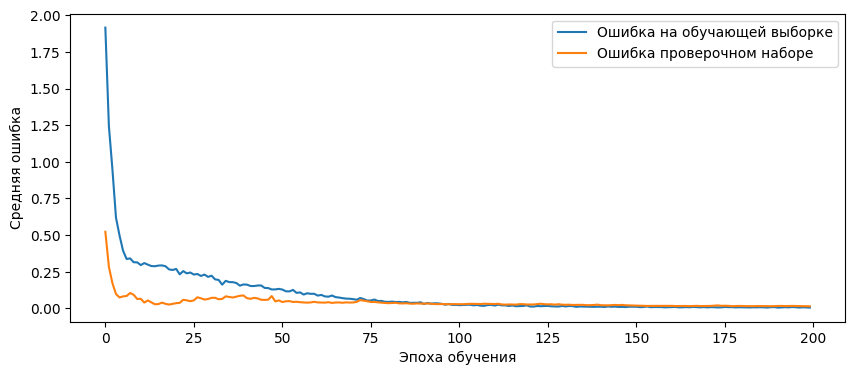

In [ ]:
x1 = BatchNormalization()(input1) 
x1 = Dense(1024, activation='relu') (x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(768, activation='sigmoid')(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(512, activation='sigmoid')(x1)

x2 = Dense(100, activation='sigmoid') (input2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(100, activation='sigmoid') (x2)


x3 = Dense(100, activation='sigmoid') (input3)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.3)(x3)
x3 = Dense(100, activation='sigmoid') (x3)

x4 = Dense(100, activation='sigmoid') (input4)
x4 = BatchNormalization()(x4)
x4 = Dropout(0.3)(x4)
x4 = Dense(100, activation='sigmoid') (x4)

x = concatenate([x1, x2, x3, x4])

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='linear')(x)

model = Model((input1, input2, input3, input4), x) 

model.compile(optimizer=opt, loss='mse', metrics=["mae"])

history = model.fit((x_train, x_train_text1, x_train_text2, x_train_text3), 
                    y_train, 
                    epochs= 200, 
                    validation_split = 0.3,
                    verbose=1, shuffle=True, callbacks=callbacks)

compare_sharp_loss(history,10,4) 

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model("/content/drive/MyDrive/Colab Notebooks/Стажировка/architecture.hdf5")

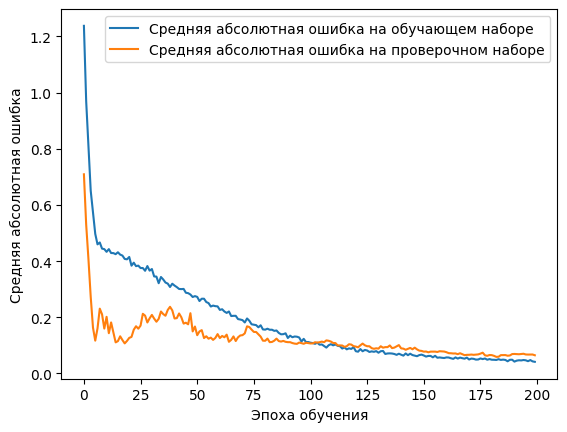

In [ ]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/Стажировка/')

13/13 [==============================] - 0s 9ms/step


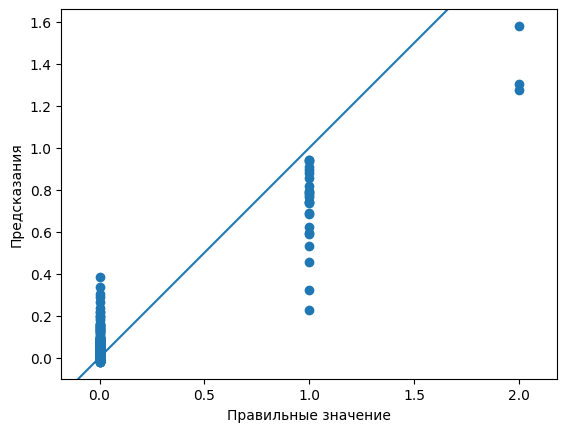

In [ ]:
pred = model.predict([x_test, x_test_text1, x_test_text2, x_test_text3]) 
plt.scatter(y_test, pred)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000])
plt.show()

In [ ]:
m_l = []
s = 0
for i in range(0, len(y_test)):
    if np.round(y_test[i]) == np.round(pred[i]):
        s += 1
    dif = (y_test[i] - pred[i])**2
    print(y_test[i], pred[i], dif, np.round(y_test[i]), np.round(pred[i]))
    m_l.append(dif)

print('Среднеквадратичное отклонение', np.sqrt(np.mean(m_l)))
print('Точность модели', round(s / len(y_test)*100,5),"%" )

0.0 [0.00712041] [5.0700237e-05] 0.0 [0.]
0.0 [0.14068817] [0.01979316] 0.0 [0.]
0.0 [0.00368624] [1.3588337e-05] 0.0 [0.]
0.0 [0.02211078] [0.00048889] 0.0 [0.]
1.0 [0.79202193] [0.04325488] 1.0 [1.]
0.0 [0.00075756] [5.73903e-07] 0.0 [0.]
0.0 [0.10147437] [0.01029705] 0.0 [0.]
0.0 [0.1998641] [0.03994566] 0.0 [0.]
0.0 [0.09297341] [0.00864406] 0.0 [0.]
0.0 [0.07030463] [0.00494274] 0.0 [0.]
0.0 [0.1998641] [0.03994566] 0.0 [0.]
0.0 [0.03065849] [0.00093994] 0.0 [0.]
1.0 [0.7848799] [0.04627665] 1.0 [1.]
0.0 [0.23518872] [0.05531374] 0.0 [0.]
0.0 [0.02858937] [0.00081735] 0.0 [0.]
0.0 [0.30247962] [0.09149393] 0.0 [0.]
0.0 [0.03642446] [0.00132674] 0.0 [0.]
0.0 [-0.00389687] [1.518563e-05] 0.0 [-0.]
1.0 [0.93442273] [0.00430038] 1.0 [1.]
0.0 [0.00220055] [4.8424017e-06] 0.0 [0.]
0.0 [-0.00679479] [4.6169156e-05] 0.0 [-0.]
1.0 [0.8195139] [0.03257523] 1.0 [1.]
0.0 [-0.00884139] [7.817014e-05] 0.0 [-0.]
0.0 [0.2871723] [0.08246792] 0.0 [0.]
0.0 [0.00660361] [4.360771e-05] 0.0 [0.]
0.0 [

# **Резюме:** 

**- При создании нейронной сети (НС) были выбраны колонки:**

**1)Пол**, 

**2)Профессия** - токенезировано.

**3)ЗаключениеМК** - разбит на 3 класса (годен ограничено годен, негоде).

**4)Возраст** - разбито на возрастные категории.

**5)Список Вредных Факторов** - токенезировано

**6)все_диагнозы** - взято текстовое представление диагоза всех специалистов и токенезировано

**7)МКБ** - взят код мкб приведен в числовой формат.

Объясняю выбор колонок: решение профпатолога зависит в том числе от совокупности решений специалистов мед.комиссии. Итогом их (узких спец.) работы (решением) является выставленный диагноз. Также важными факторами для того или иного решения профпатолога являются: возраст, пол, вредые факторы производства(работы).

В процессе работы над нейронной сетью датасет **не был** искусственно увеличен данными из официальных приказов для профпатологов. 

Подход при котором датасет увеличивается за счет достоверных данных из приказов считаю  перспективным, но хотелось бы поработать с новым улучшенным датасетом от заказчика (с увеличенным кол-вом примеров по другим классам) прежде чем добавлять костыли.

# **Вывод:** 

Точность нейронной сети при классификации на 3 класса составила ~**98.72 %**.

________________________________________


____________________________________

_____________________________________________